# Analisis Category Technology di Kawasan Southeast Asia

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Misalkan df adalah DataFrame asli Anda
df = pd.read_csv('SuperStore_Orders.csv', sep = ",", encoding="ISO-8859-1")

# Buat duplikat DataFrame
df_copy = df.copy()

In [4]:
# Ubah kolom 'sales' menjadi string terlebih dahulu, jika diperlukan
df_copy['sales'] = df_copy['sales'].astype(str)

# Ganti koma (,) dengan titik (.)
df_copy['sales'] = df_copy['sales'].str.replace(',', '.', regex=False)

# Konversi kolom 'sales' menjadi numerik
df_copy['sales'] = pd.to_numeric(df_copy['sales'], errors='coerce')


In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  float64
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [6]:
# Drop kolom yang tidak diperlukan
df_copy.drop(columns=['order_id', 'order_date','ship_date','customer_name','order_priority'], inplace=True)
df_copy

,ship_mode,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,year
0,Standard Class,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.1400,35.46,2011
1,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.0360,9.72,2011
2,Second Class,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.6400,8.17,2011
3,Second Class,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45.0,3,0.5,-26.0550,4.82,2011
4,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,0.1,37.7700,4.70,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Standard Class,Corporate,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14.0,2,0.2,4.5188,0.89,2014
51286,Standard Class,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4.0,1,0.0,0.4200,0.49,2014
51287,Second Class,Consumer,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.0,3,0.0,12.3600,0.35,2014
51288,Standard Class,Consumer,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.0,1,0.0,0.5600,0.20,2014


## Analisis Profit dan Quantity per Category

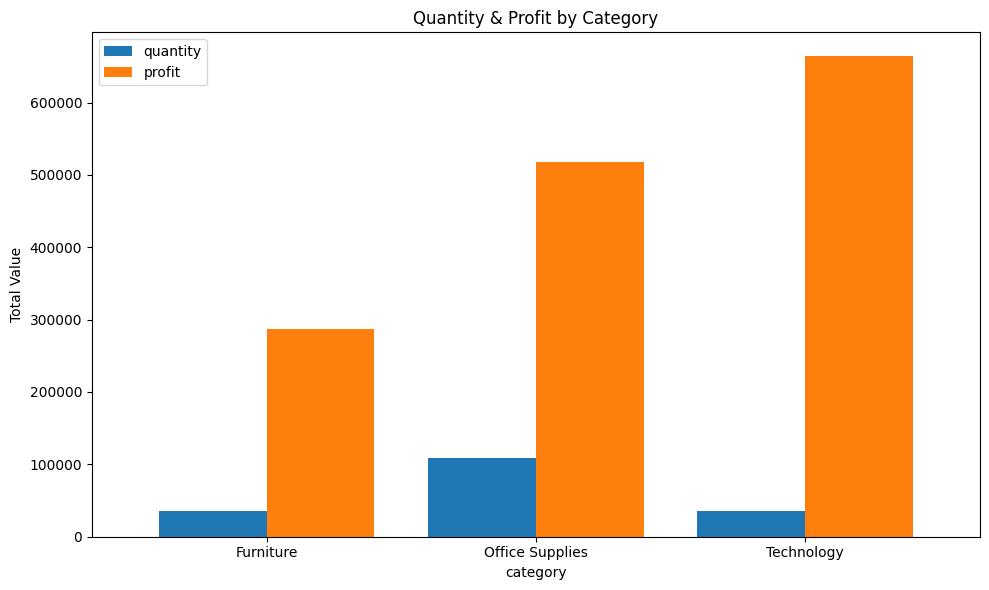

In [7]:
# Profit dan Quantity per Category
profit_quantity_category = df_copy.groupby('category').agg({
    'quantity': 'sum',
    'profit': 'sum'
}).reset_index()

# Plot bar chart
fig, ax = plt.subplots(figsize=(10,6))
profit_quantity_category.set_index('category')[['quantity', 'profit']].plot(
    kind='bar', ax=ax, width=0.8
)
plt.title("Quantity & Profit by Category")
plt.ylabel("Total Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


- furniture : memiliki profit dan quantity yang rendah
- office supplies : memiliki quantity yang sangat tinggi tetapi profitnya tidak terlalu tinggi
- technology : memiliki quantity yang rendah tetapi profitnya tinggi

## Analisis untuk Technology berdasarkan Region

In [8]:
df_tech = df_copy[df_copy['category'] == 'Technology']

# Group by region
agg_data = df_tech.groupby('region').agg({
    'sales': 'sum',
    'profit': 'sum'
}).reset_index()

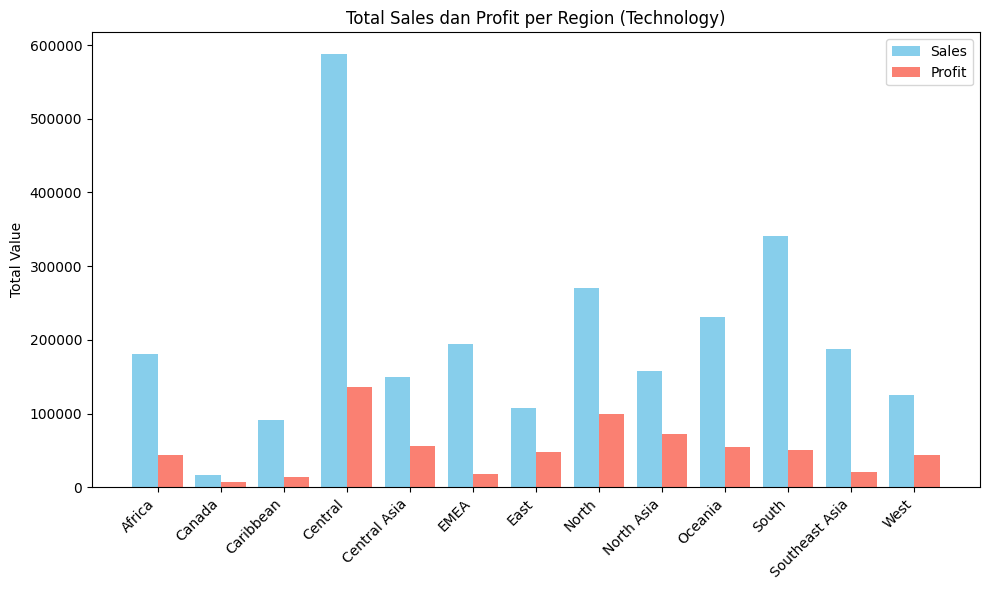

In [9]:
x = np.arange(len(agg_data['region']))
width = 0.4 

fig, ax = plt.subplots(figsize=(10,6))

# Bar untuk Sales
ax.bar(x - width/2, agg_data['sales'], width, label='Sales', color='skyblue')

# Bar untuk Profit
ax.bar(x + width/2, agg_data['profit'], width, label='Profit', color='salmon')

# Label & style
ax.set_xticks(x)
ax.set_xticklabels(agg_data['region'], rotation=45, ha='right')
ax.set_ylabel("Total Value")
ax.set_title("Total Sales dan Profit per Region (Technology)")
ax.legend()

plt.tight_layout()
plt.show()


## Analisis Growth Category Technology per Region (based on profit)

In [10]:
# Group by region dan year untuk mendapatkan total sales per region dan tahun
sales_by_region_year = df_tech.groupby(['region', 'year'])['profit'].sum().reset_index()

# Pivot data agar 'year' menjadi kolom dan kita bisa menghitung growth per region
sales_pivot = sales_by_region_year.pivot(index='region', columns='year', values='profit')

# Menghitung growth antara tahun 2014 dan 2013
sales_pivot['growth'] = (sales_pivot[2014] - sales_pivot[2013]) / sales_pivot[2013] * 100

# Menyortir berdasarkan growth (dari yang terbesar ke yang terkecil)
sales_pivot_sorted = sales_pivot.sort_values(by='growth', ascending=False)

# Menampilkan hasil growth yang sudah disortir
print(sales_pivot_sorted[['growth']])


year                 growth
region                     
EMEA            1888.285991
East             166.978374
Southeast Asia   152.305093
West              99.447402
Africa            56.238448
Central Asia      26.370789
Caribbean         23.867810
North             18.350974
North Asia        17.305695
Central           16.908064
Canada            15.643115
South             -5.359074
Oceania          -20.103199


Insight:
- Southeast Asia dipilih karena region ini menunjukkan growth tertinggi (152.31%) di antara region Asia lainnya, seperti North Asia (17.31%) dan Central Asia (26.37%).
- Dengan pertumbuhan yang pesat, Southeast Asia menjadi pasar yang sangat potensial untuk diperhatikan.

## Analisis Category Technology di Southeast Asia (Sales, Profit, Shipping Cost)

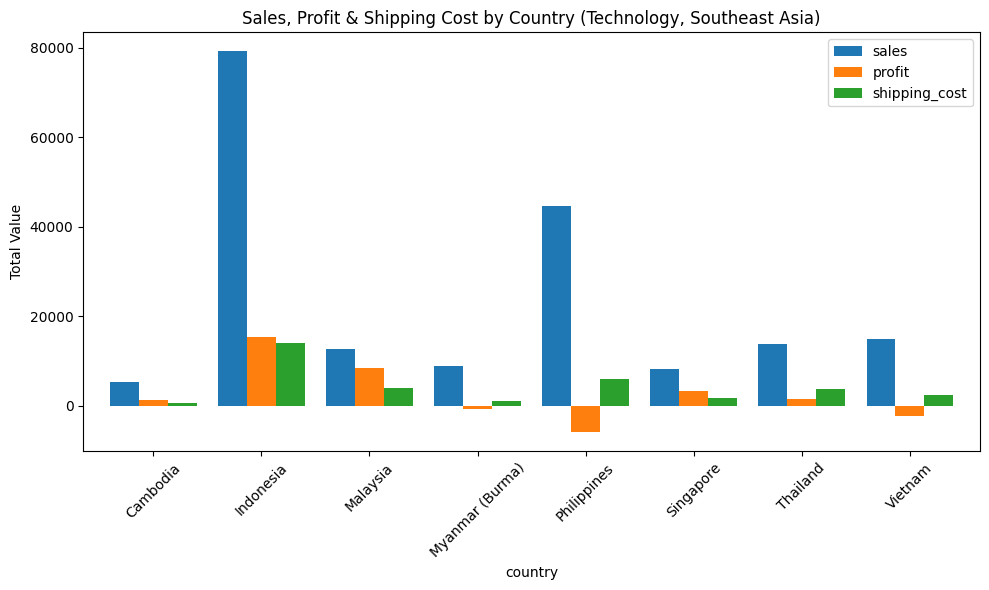

In [11]:
# Filter Southeast Asia & Category Technology
df_sea = df_copy[(df_copy['region'] == 'Southeast Asia') & (df_copy['category'] == 'Technology')]

# Group by country
sea_country = df_sea.groupby('country').agg({
    'sales': 'sum',
    'profit': 'sum',
    'shipping_cost': 'sum'
}).reset_index()

# Plot bar chart
fig, ax = plt.subplots(figsize=(10,6))
sea_country.set_index('country')[['sales', 'profit', 'shipping_cost']].plot(
    kind='bar', ax=ax, width=0.8
)

plt.title("Sales, Profit & Shipping Cost by Country (Technology, Southeast Asia)")
plt.ylabel("Total Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight:
- Indonesia merupakan penyumbang profit dan sales tertinggi terhadap growth region Southeast Asia sehingga dapat dijadikan sebagai market utama.
- Philippines, Vietnam, dan Myanmar merupakan negara dengan profit terrendah pada region Southeast Asia.
- Indonesia menunjukkan potensi pasar besar, namun perlu fokus pada efisiensi logistik dan pengelolaan biaya pengiriman untuk meningkatkan profit margin.
- Philippines membutuhkan evaluasi lebih dalam terkait struktur biaya dan strategi distribusi, serta perlu penyesuaian harga atau penurunan biaya pengiriman untuk meningkatkan profitabilitas.

## Analisis Lebih Lanjut

## Analisis Profit Margin

In [12]:
# Kelompokkan data per negara dan hitung total sales, profit, shipping_cost
country_margin = df_sea.groupby('country')[['sales', 'profit', 'shipping_cost']].sum().reset_index()

# Hitung profit margin (%)
country_margin['profit_margin_pct'] = (country_margin['profit'] / country_margin['sales']) * 100
country_margin[['country','sales','profit','shipping_cost','profit_margin_pct']]


,country,sales,profit,shipping_cost,profit_margin_pct
0,Cambodia,5357.000,1326.3600,544.65,24.759380
1,Indonesia,79204.932,15291.3957,13884.61,19.306116
2,Malaysia,12686.592,8492.5800,3877.03,66.941382
3,Myanmar (Burma),8861.056,-694.9077,1023.02,-7.842267
4,Philippines,44684.247,-5957.8920,5878.11,-13.333316
5,Singapore,8197.657,3351.9900,1577.27,40.889610
6,Thailand,13856.229,1426.0500,3795.41,10.291761
7,Vietnam,14807.522,-2286.7320,2443.78,-15.443043


Insight:
- Malaysia, Singapore, dan Cambodia menunjukkan profit margin yang sehat.
- Indonesia memiliki profit margin positif, tetapi biaya pengiriman yang tinggi dapat mengurangi margin lebih lanjut.
- Philippines, Vietnam, dan Myanmar perlu fokus pada pengelolaan biaya pengiriman dan efisiensi distribusi untuk meningkatkan profitabilitas.

## Analisis Diskon

In [13]:
# Analisis Diskon
country_discount = df_sea.groupby('country')['discount'].mean().reset_index()
country_discount

,country,discount
0,Cambodia,0.000000
1,Indonesia,0.221429
2,Malaysia,0.000000
3,Myanmar (Burma),0.294138
4,Philippines,0.326510
5,Singapore,0.000000
6,Thailand,0.296667
7,Vietnam,0.324098


Insight:
> Berdasarkan data discount per country, Indonesia, Myanmar, Philippines, Thailand, dan Vietnam memberikan diskon signifikan dengan Philippines dan Myanmar menawarkan diskon terbesar. Sementara itu, Cambodia, Malaysia, dan Singapore tidak memberikan diskon sama sekali. Negara-negara yang menawarkan diskon lebih tinggi cenderung memiliki profit margin yang lebih rendah, yang menunjukkan bahwa diskon mungkin digunakan untuk meningkatkan volume penjualan, tetapi dapat menekan profitabilitas.

## Analisis per Sub-Category (Technology, Southeast Asia)

In [14]:

df_sea.groupby(['country','sub_category']).agg({
    'quantity':'sum',
    'sales':'sum',
    'profit':'sum',
    'shipping_cost':'sum'
}).reset_index()


,country,sub_category,quantity,sales,profit,shipping_cost
0,Cambodia,Accessories,5,335.000,80.1300,68.12
1,Cambodia,Copiers,11,2586.000,614.2200,246.98
2,Cambodia,Machines,14,1405.000,445.8300,143.39
3,Cambodia,Phones,9,1031.000,186.1800,86.16
4,Indonesia,Accessories,263,11322.044,-4795.4049,1297.58
5,Indonesia,Copiers,280,30459.693,11385.8169,5827.12
6,Indonesia,Machines,200,15612.252,3398.4105,2392.80
7,Indonesia,Phones,271,21810.943,5302.5732,4367.11
8,Malaysia,Accessories,55,2051.350,1874.0400,696.22
9,Malaysia,Copiers,33,3911.028,2635.6800,801.38


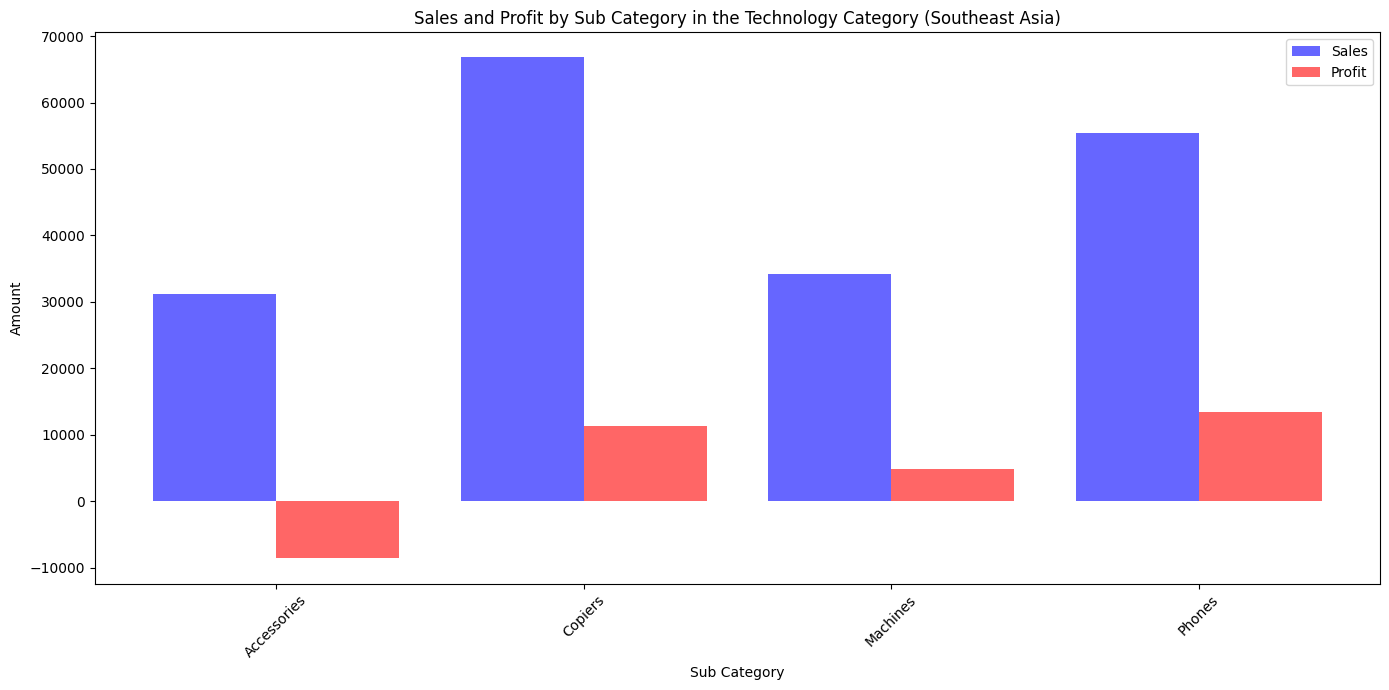

In [15]:
df_technology_sea = df_sea[df_sea['category'] == 'Technology']

# Group by sub_category dan hitung total sales dan profit
sub_category_summary_sea = df_technology_sea.groupby('sub_category').agg({'sales': 'sum', 'profit': 'sum'}).reset_index()

# Membuat diagram bar untuk sales dan profit
plt.figure(figsize=(14, 7))
bar_width = 0.4
x = range(len(sub_category_summary_sea))

# Bar chart untuk Sales
plt.bar(x, sub_category_summary_sea['sales'], width=bar_width, label='Sales', color='b', alpha=0.6)

# Bar chart untuk Profit
plt.bar([i + bar_width for i in x], sub_category_summary_sea['profit'], width=bar_width, label='Profit', color='r', alpha=0.6)

# Menambahkan elemen-elemen lain
plt.title('Sales and Profit by Sub Category in the Technology Category (Southeast Asia)')
plt.xlabel('Sub Category')
plt.ylabel('Amount')
plt.xticks([i + bar_width / 2 for i in x], sub_category_summary_sea['sub_category'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
sub_category_summary_sea

,sub_category,sales,profit
0,Accessories,31168.618,-8641.5255
1,Copiers,66792.201,11355.5352
2,Machines,34235.374,4782.7431
3,Phones,55459.042,13452.0912


In [24]:
# Filter data untuk sub_kategori 'Copier' dan 'Phones'
df_copiers_phones = df_sea[df_sea['sub_category'].isin(['Copiers', 'Phones'])]

# Menghitung total sales dan profit
# Menghitung statistik deskriptif
descriptive_stats = df_copiers_phones.groupby('sub_category').agg({
    'sales': ['count', 'mean', 'std', 'min', 'max', 'sum', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    'profit': ['count', 'mean', 'std', 'min', 'max', 'sum', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
}).reset_index()

# Menambahkan nama kolom
descriptive_stats.columns = ['sub_category', 'count_sales', 'mean_sales', 'std_sales', 
                             'min_sales', 'max_sales', 'sum_sales', 'Q1_sales', 'Q3_sales',
                             'count_profit', 'mean_profit', 'std_profit', 'min_profit', 
                             'max_profit', 'sum_profit', 'Q1_profit', 'Q3_profit']

# Menampilkan hasil
final_stats = descriptive_stats[['sub_category', 'count_sales', 'mean_sales', 'std_sales', 
                                  'min_sales', 'Q1_sales', 'Q3_sales', 'max_sales', 
                                  'sum_sales', 'count_profit', 'mean_profit', 'std_profit', 
                                  'min_profit', 'Q1_profit', 'Q3_profit', 'max_profit', 'sum_profit']]
print(final_stats)

  sub_category  count_sales  mean_sales   std_sales  min_sales  Q1_sales  \
0      Copiers          183  364.984705  262.168689      1.000     178.0   
1       Phones          194  285.871351  230.482872      1.056     121.0   

   Q3_sales  max_sales  sum_sales  count_profit  mean_profit  std_profit  \
0     560.0      969.0  66792.201           183    62.052105  201.510109   
1     393.5      977.0  55459.042           194    69.340676  170.443108   

   min_profit  Q1_profit  Q3_profit  max_profit  sum_profit  
0    -456.174 -37.621500  131.99805    938.7954  11355.5352  
1    -417.813  -1.929375   90.21135    946.6338  13452.0912  


Insight:
- sub_category copiers dan phones merupakan sub_category yang memiliki potensi besar di kawasan southeast asia.
- jika company berfokus pada total penjualan maka bisa lebih fokus pada copiers (berdasarkan sales lebih unggul)
- namun, jika berfokus pada profit, maka phones memberikan keuntungan yang lebih besar.
- perusahaan ini berfokus untuk meningkatkan profit, untuk menunjukkan pertumbuhan yang berkelanjutan

## Analisis Phones di Southeast Asia

C:\Users\72532\AppData\Local\Temp\ipykernel_5592\3028692114.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_products, x='product_name', y='profit', palette='viridis')


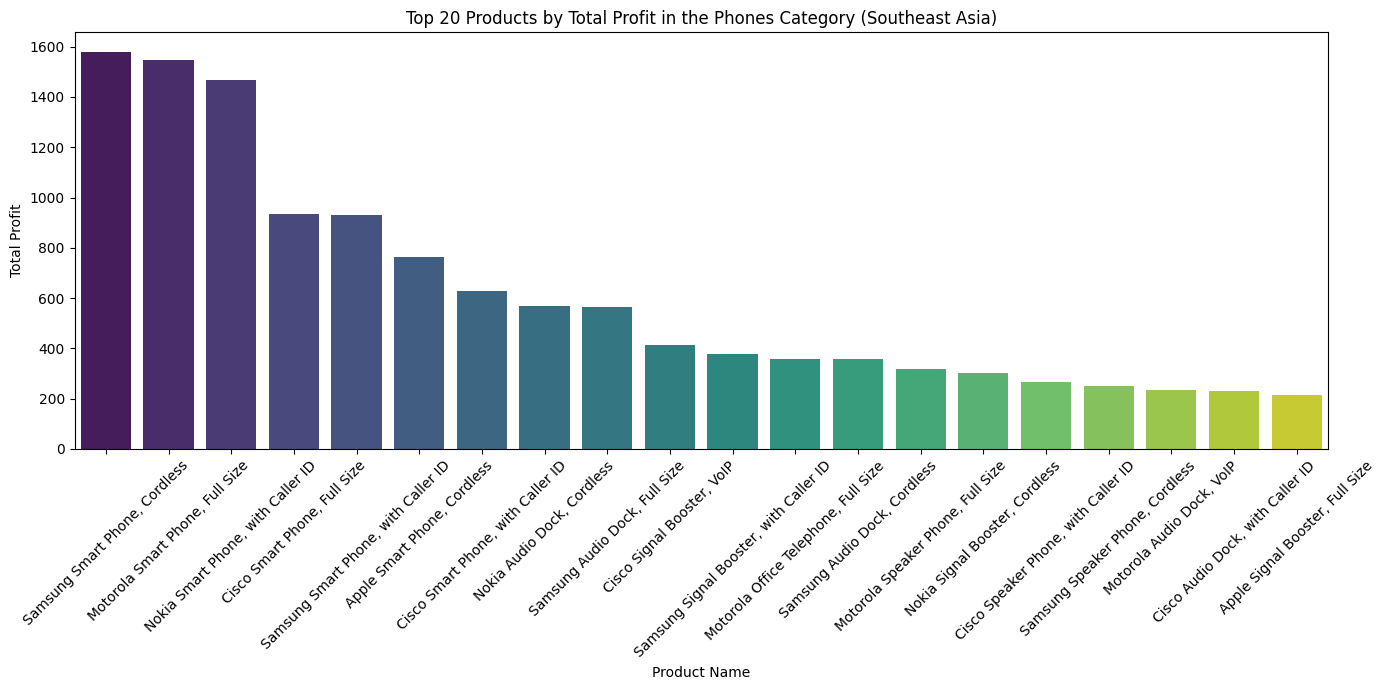

In [18]:
# Filter data untuk sub_category = 'Phones'
df_phones_sea = df_sea[df_sea['sub_category'] == 'Phones']

# Group by nama produk dan hitung total profit
product_profit_summary_sea = df_phones_sea.groupby('product_name').agg({'profit': 'sum'}).reset_index()

# Sort berdasarkan profit secara descending
product_profit_summary_sea = product_profit_summary_sea.sort_values(by='profit', ascending=False)

# Ambil 20 produk teratas
top_20_products = product_profit_summary_sea.head(20)

# Visualisasi: Bar Chart untuk Profit berdasarkan Nama Produk
plt.figure(figsize=(14, 7))
sns.barplot(data=top_20_products, x='product_name', y='profit', palette='viridis')
plt.title('Top 20 Products by Total Profit in the Phones Category (Southeast Asia)')
plt.xlabel('Product Name')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\72532\AppData\Local\Temp\ipykernel_5592\4082134479.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_20_products, x='product_name', y='profit', palette='viridis')


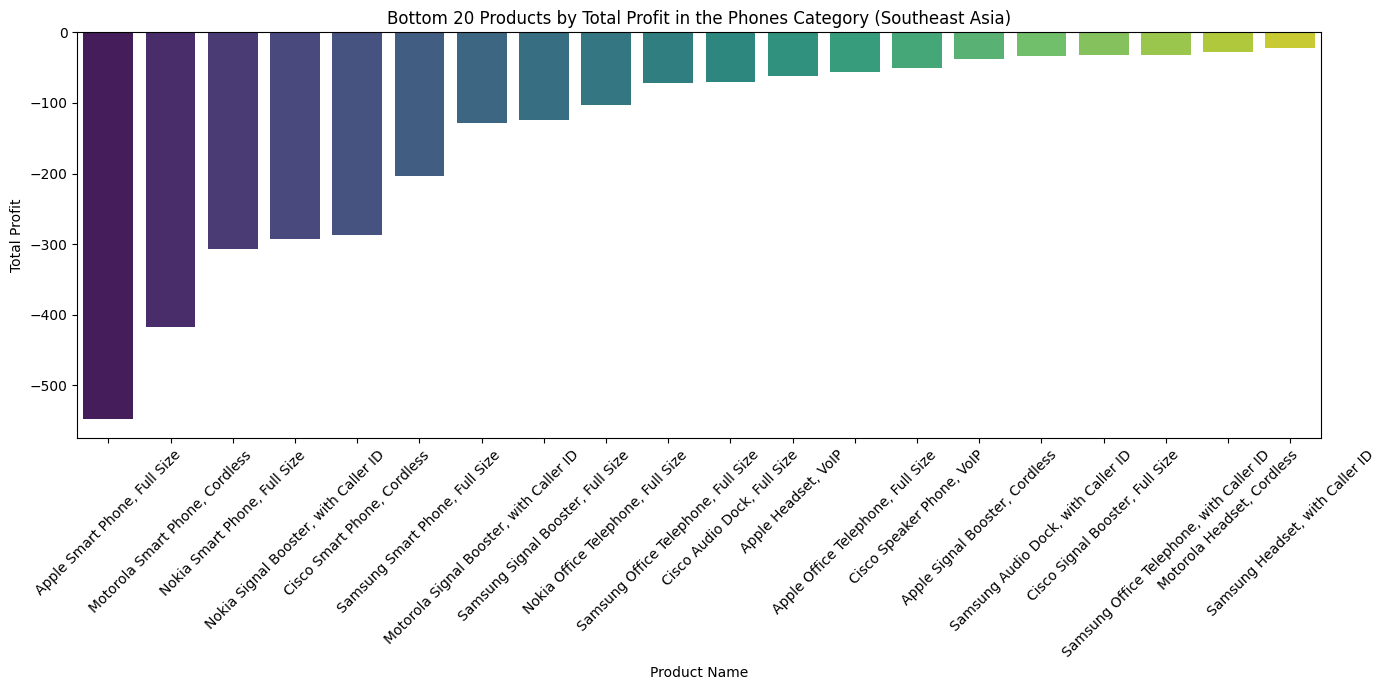

In [19]:
# Sort berdasarkan profit secara ascending
product_profit_summary_sea1 = product_profit_summary_sea.sort_values(by='profit', ascending=True)

# Ambil 20 produk terbawah
bottom_20_products = product_profit_summary_sea1.head(20)

# Visualisasi: Bar Chart untuk Profit berdasarkan Nama Produk
plt.figure(figsize=(14, 7))
sns.barplot(data=bottom_20_products, x='product_name', y='profit', palette='viridis')
plt.title('Bottom 20 Products by Total Profit in the Phones Category (Southeast Asia)')
plt.xlabel('Product Name')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight:
- Top 20 Produk dengan Keuntungan Terbesar:
> Produk dengan keuntungan terbesar adalah Samsung Smart Phone, Cordless, diikuti oleh produk lain seperti Motorola Smart Phone, Full Size dan Nokia Smart Phone, Full Size.
> Ada dominasi produk Smart Phone dan Cordless dari beberapa merek terkenal seperti Samsung, Motorola, dan Nokia. Produk dengan fitur Caller ID dan Full Size juga menunjukkan profitabilitas yang tinggi.

- Bottom 20 Produk dengan Keuntungan Terkecil:
> Di sisi lain, produk dengan keuntungan terkecil adalah Apple Smart Phone, Full Size, diikuti oleh beberapa produk lain seperti Motorola Smart Phone, Full Size, dan Nokia Signal Booster.
> Produk Headset dan Signal Booster tampaknya tidak begitu menguntungkan dibandingkan dengan kategori Smart Phone dan Cordless yang lebih populer.

## Kesimpulan:
1. Beberapa negara membutuhkan optimasi pengiriman: Negara dengan biaya pengiriman tinggi seperti Indonesia perlu fokus pada efisiensi logistik untuk meningkatkan profit margin. -> evaluasi dan pilih metode pengiriman yang lebih efisien, sentralisasi gudang agar biaya lebih murah.
2. Profit margin negatif di beberapa negara: Negara seperti Philippines, Myanmar, dan Vietnam menunjukkan profit negatif meski ada volume penjualan, yang menunjukkan bahwa biaya pengiriman atau biaya lainnya terlalu tinggi. -> analisis struktur biaya, penyesuaian harga.
3. Strategi diskon dan pengaruhnya: Negara seperti Indonesia, Myanmar, Philippines, Thailand, dan Vietnam memberikan diskon yang signifikan, namun hal ini mungkin menyebabkan penurunan profit margin -> batasi diskon yang tidak terlalu besar, diskon berdasarkan volume.
4. potensi market phones dan copier di southeast asia sangat tinggi terutama untuk 